# Objective: 

Experimentation is key to innovation at big tech companies. And to measure its success, there needs to be statistical rigor and not just lift in the test group.

After helping to build out v0 experimentation framework at Mercari, I wanted to dig deeper into A/B testing advancements when it comes to more rigorous and modern techniques. 

This notebook serves as a Python code application of this [Towards Data Science article](https://towardsdatascience.com/how-to-select-the-right-statistical-tests-for-different-a-b-metrics-c8a1865851e) about how experimentation was done at TikTok as well as answers to [interview questions](https://prepfully.com/interview-questions/stitch-fix/data-scientist?page=3) from Stitch Fix's Data Scientist team.

In [1]:
!pip install duckdb jupysql --quiet

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats
import matplotlib.pyplot as plt

import duckdb

%load_ext sql
conn = duckdb.connect()
%sql conn --alias duckdb

Deploy Shiny apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


# Stitch Fix DS Interview Questions for Experimentation 
(and maybe look into coding questions)

In [3]:
# What is the Python code for calculating the confidence intervals for a mean?

#ChatGPT 3.5

# Generate some sample datanp.random.seed(42)  # For reproducibility
data = np.random.normal(loc=5, scale=2, size=100)  # Sample data with mean 5 and standard deviation 2

# Calculate mean and standard error of the mean (SEM)
mean = np.mean(data)
sem = stats.sem(data)

# Define confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate margin of error
margin_of_error = sem * stats.t.ppf((1 + confidence_level) / 2, len(data) - 1)

# Calculate confidence interval
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

print("Sample Mean:", mean)
print("Standard Error of the Mean (SEM):", sem)
print(f"Confidence Interval ({confidence_level * 100}%):", confidence_interval)


Sample Mean: 5.2981137118582105
Standard Error of the Mean (SEM): 0.19302578810818985
Confidence Interval (95.0%): (4.915108671015617, 5.681118752700804)


In [4]:
#ChatGPT 4.0 Turbo:

# Let's assume you have some data in a Python list
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Calculate the mean and standard error
mean = np.mean(data)
standard_error = scipy.stats.sem(data)

# Define the confidence level to be 95%
confidence_level = 0.95

# Calculate the confidence interval
confidence_interval = scipy.stats.t.interval(confidence_level, len(data)-1, loc=mean, scale=standard_error)

print(f"The confidence interval is: {confidence_interval}")

The confidence interval is: (3.3341494103866087, 7.665850589613392)


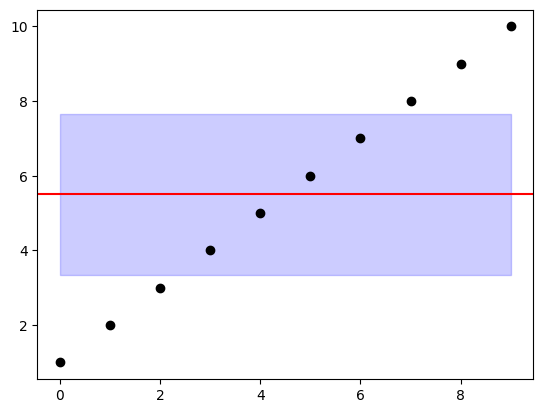

In [5]:
# Plot the CI intervals

# Create a figure and a subplot
fig, ax = plt.subplots()

# Plot the mean as a red line
ax.axhline(mean, color='red')

# Plot the confidence interval as a blue band
ax.fill_between(range(len(data)), confidence_interval[0], confidence_interval[1], color='blue', alpha=0.2)

# Plot the data points
ax.plot(data, 'ko')

# Show the plot
plt.show()

In [6]:
# Let us use some more realistic data from e-commerce store (which is what TikTok article referenced as well as similar to current Stitch Fix biz model - Freestyle)
cust_behav = pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Oct.csv')
cust_behav

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
...,...,...,...,...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204


In [7]:
# %%timeit

# cust_behav2 = pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv')
# cust_behav2

In [8]:
# Will reduce the dataset to 80% and see if notebook crashes
cb_sample = cust_behav.sample(frac=0.54)

In [9]:
# Choosing to use dataset with even number of users. 
# Event-level data so massive dataset with 42 million rows. 
# Let us explore the data a bit more to see right now how much it can be used for interview q's as well as for practical app of article

query = """
select count(distinct user_id) as unique_users
from cb_sample
"""

duckdb.query(query).df()

,unique_users
0,2586788


In [10]:
query = """
select event_type
, count(*) as total
from cb_sample
group by 1
order by 2 desc
"""

duckdb.query(query).df() # Typical funnel (inverted triangle)

,event_type,total
0,view,22021078
1,cart,499728
2,purchase,401527


In [11]:
# Need to create user table with experient group assignment. Then join this to event table

query = """
select distinct user_id
from cb_sample
"""

users = duckdb.query(query).df()
len(users)

2586788

In [12]:
# Create list of even amont of ctl and test labels, randomize the labels and append to users table

half_length = len(users) // 2
experiment_group = ['control'] * half_length + ['test'] * half_length
np.random.shuffle(experiment_group)
users['experiment_group'] = experiment_group

In [13]:
query = """
select experiment_group
, count(*) as count
from users
group by 1
"""

duckdb.query(query).df()

,experiment_group,count
0,test,1293394
1,control,1293394


In [14]:
users.head()

,user_id,experiment_group
0,561504334,test
1,542079403,test
2,549689971,control
3,526027947,test
4,553669216,test


In [15]:
# join users table to event table
query = """
select *
from users u
join cb_sample scb
on u.user_id = scb.user_id
"""

df = duckdb.query(query).df()
len(df) == len(cb_sample)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

True

In [16]:
# Now let us aggregate data at randomization unit to build CI interval
# Simulating real biz A/B test data

# Calculate avg views/carts/purchase per user for each experiment group
query = """
select experiment_group
, sum(case when event_type = 'view' then 1 else 0 end)/count(distinct user_id) as views_per_user
, sum(case when event_type = 'cart' then 1 else 0 end)/count(distinct user_id) as carts_per_user
, sum(case when event_type = 'purchase' then 1 else 0 end)/count(distinct user_id) as purchases_per_user
from df
group by 1
"""

user_avg_metric = duckdb.query(query).df()
user_avg_metric

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,experiment_group,views_per_user,carts_per_user,purchases_per_user
0,control,8.512728,0.193189,0.153842
1,test,8.513080,0.193181,0.156603


In [17]:
#Does this make sense?